In [1]:
#importing the library 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#reading the data from csv file using pandas
dataset=pd.read_csv('Mall_Customers.csv')

In [3]:
#print the values 
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
#with the values selcted full rows and selective columns
x=dataset.iloc[:,3:5].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
from sklearn.cluster import AffinityPropagation
#generating the sample data
from sklearn.datasets import make_blobs
Makeblobs = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

In [6]:
#model creation
clustermodel=AffinityPropagation(damping=0.5, max_iter=200, convergence_iter=15, copy=True, 
                                 affinity='euclidean', verbose=False,preference=-50, random_state=0)
label=clustermodel.fit_predict(x)

In [7]:
#assigning the values dataset to supervised 
supervised=dataset

In [8]:
#to print the values of supervised
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
#append the clustered values on supervised table 
supervised['cluster_group']=label

In [10]:
#view the appended values on table
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,54
196,197,Female,45,126,28,55
197,198,Male,32,126,74,56
198,199,Male,32,137,18,57


In [11]:
#to save the table of content to csv file
supervised.to_csv("cluster",index=False)

C:\Anconda\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


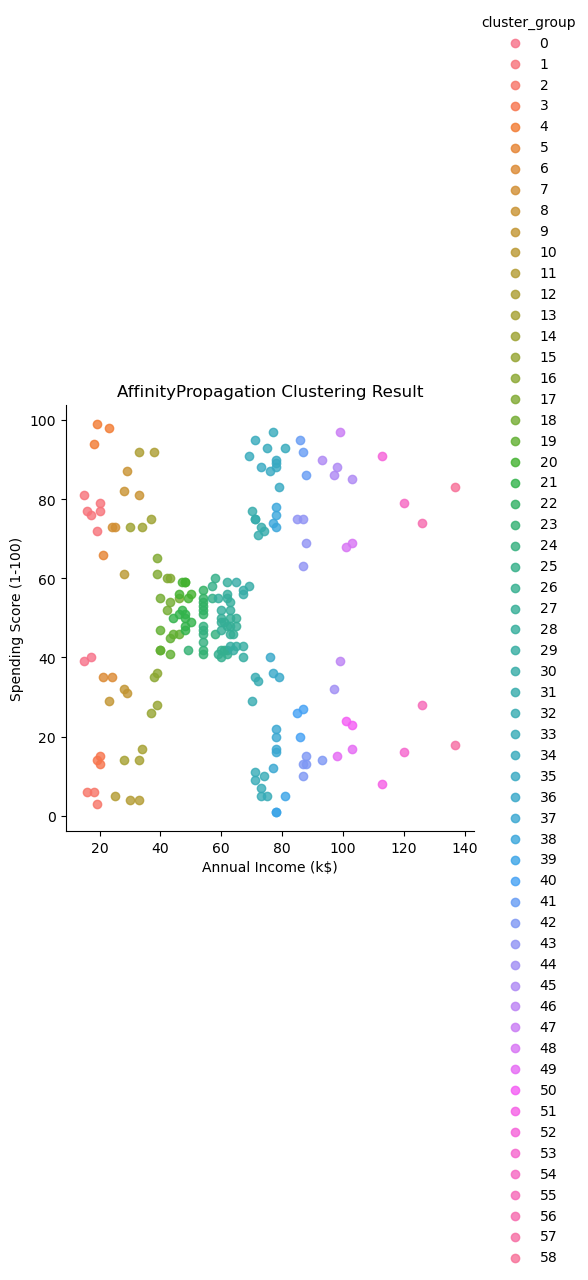

In [12]:
#to plot the cluster in graph, in this hue use for difference of cluster,
#fit_reg for plot the coorect manner
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],
                 fit_reg=False,hue=supervised.columns[5],legend=True,legend_out=True)
plt.title('AffinityPropagation Clustering Result')
plt.show()